# Introduction to Simulated Annealing 

## find the minimum of a function

found minimum at: 2.980208711929146


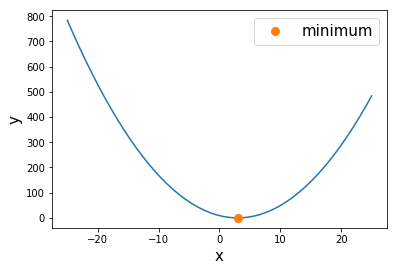

In [4]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 


def f(x,a=3.0):
    return (x-a)**2 

def update_temp(T, alpha):
    '''
    Exponential cooling scheme
    :param T: current temperature.
    :param alpha: Cooling rate.
    :return: new temperature
    '''
    T *= alpha
    return T


def simmulated_annealing(my_function, Tstart=100., Tfinal=0.0008,delta=1., alpha=0.99):
    
    T = Tstart
    step=0
    
    x = 7.0
    while T>Tfinal:
        step +=1 
        if (step % 100 == 0):
            T = update_temp(T, alpha)
        x_trial = x + np.random.uniform(-delta, delta)
        x = Metropolis(my_function, x, x_trial, T)
    return x
    
def Metropolis(f, x,x_trial,T):
    Vnew = f(x_trial)
    Vold = f(x)
    if (np.random.uniform() < np.exp(-(Vnew - Vold) / T)):
        x = x_trial
    return x




x_opt = simmulated_annealing(my_function=f)
print ("found minimum at: " + str(x_opt))
x = np.linspace(-25,25);

plt.plot(x, f(x))
plt.plot(x_opt, f(x_opt), linestyle='',marker='o', markersize='8', label='minimum');
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(fontsize=15);

# Function with two local minima and 1 global minimum 

found minimum at: 7.193332818137408


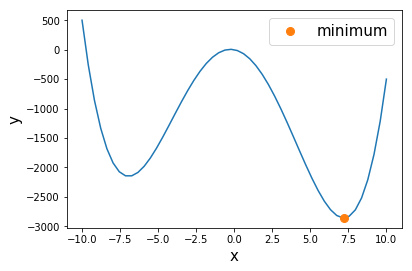

In [5]:
def f(x,a=1.0,b=-100., c=50.0):
    return a*x**4  + b*x**2  -c *x 


x_opt = simmulated_annealing(my_function=f,Tfinal=0.0001)
print ("found minimum at: " + str(x_opt))
x = np.linspace(-10,10);

plt.plot(x, f(x))
plt.plot(x_opt, f(x_opt), linestyle='',marker='o', markersize='8', label='minimum');
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(fontsize=15);


# fitting a function: chi-square optimisation 

Now let us expand the code to not find the minimum of a desired function, but to fit a desired function to given datapoints and minimize the $\chi^2$-statistic instead

In [7]:
import numpy as np

def chi_squared(f, parameters, xdata,ydata,yerr):
    model = f(xdata, parameters)
    return np.sum(((model - ydata) / yerr) ** 2)




def simmulated_annealing_fit(my_function,xdata, ydata,yerr, Tstart=100., Tfinal=0.1,delta=0.5, alpha=0.99, 
                             nmbr_parameters=2):
    T = Tstart
    step=0
    X = np.zeros(nmbr_parameters)
    while T>Tfinal:
        step +=1 
        if (step % 100 == 0):
            T = update_temp(T, alpha)
        X_trial = X[0] + np.random.uniform(-delta, delta)
        X = Metropolis(my_function, X, X_trial, xdata, ydata, yerr, T)
    return X

def Metropolis(f, X,X_trial, xdata, ydata, yerr,T):
    Vnew = chi_squared(f, X_trial, xdata,ydata,yerr)
    Vold = chi_squared(f, X, xdata,ydata,yerr)
    if (np.random.uniform() < np.exp(-(Vnew - Vold) / T)):
        X = X_trial
    return X

def update_temp(T, alpha):
    '''
    Exponential cooling scheme
    :param T: current temperature.
    :param alpha: Cooling rate.
    :return: new temperature
    '''
    T *= alpha
    return T


## example 1: fit a line to approximately linear data 

slope:  5.5432274992806265
offset:  1.893288544090408


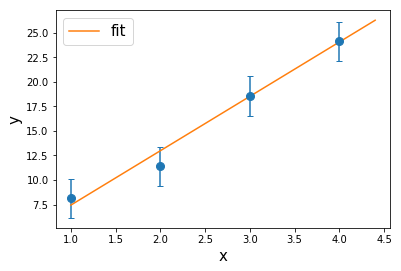

In [8]:
def line(x,parameters):
    a = parameters[0]
    b = parameters[1]
    return a*x + b 


#-- give the true paramter values as input: Test case: 
a = 5.
b = 2.

# -- generate mock experimental data by adding some (gaussian) noise: 
xdata = np.arange(1,5)
yerr = 2.
ydata = line(xdata, [a,b]) + np.random.normal(scale=yerr,size=len(xdata))



#--- use SA algorithm to fit the parameter values from data: 
parameters = simmulated_annealing_fit(line, xdata, ydata, yerr)
print ("slope: ", parameters[0])
print ("offset: ", parameters[1])

x = np.linspace(np.min(xdata),np.max(xdata)+0.1*np.max(xdata),100)


plt.errorbar(xdata, ydata,yerr, markersize=8,marker='o', capsize=3, linestyle='');
plt.plot(x, line(x,parameters), label='fit')
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(fontsize=15);

## example 2: exponential distribution

rate:  10.47293269139328


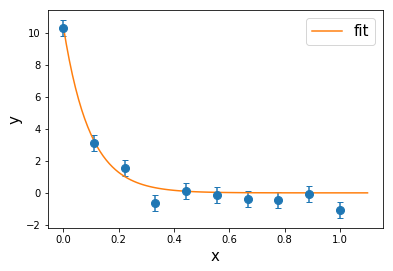

In [10]:
def exponential(x,parameters):
    k = parameters[0]
    return k * np.exp(-k*x)

#-- give the true paramter values as input: Test case: 
k = 10.

# -- generate mock experimental data by adding some (gaussian) noise: 
xdata = np.linspace(0,1.,10)
yerr = 0.5
ydata = exponential(xdata, [k]) + np.random.normal(scale=yerr,size=len(xdata))



#--- use SA algorithm to fit the parameter values from data: 
parameters = simmulated_annealing_fit(exponential, xdata, ydata, yerr)
print ("rate: ", parameters[0])

x = np.linspace(np.min(xdata),np.max(xdata)+0.1*np.max(xdata),100)


plt.errorbar(xdata, ydata,yerr, markersize=8,marker='o', capsize=3, linestyle='');
plt.plot(x, exponential(x,parameters), label='fit')
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(fontsize=15);